In [42]:
# Imports
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Creating the single layer perceptron (3 points)

In this lab we will focus on the perceptron, and how it can be used to model logic gates. Further, this same idea can be extended further due to perceptrons being a universal function approximator

**Implement the `sigmoid` function** *(1 point)*

$𝑆(x) = \frac{1}{1 + e^{-x}}$



In [43]:
def sigmoid(x):
  '''
    Applies the sigmoid function to the given input

    Parameters
    ----------
    x: torch.Tensor
        Input array/tensor

    Returns
    -------
    out: torch.Tensor
        Tensor after applying sigmoid function to it
  '''
  return 1/(1+torch.exp(-x))

In [44]:
# Testing sigmoid
sigmoid(torch.tensor([0.5, 0.5, 0, 1, -1, 10e8, -10e8]))

tensor([0.6225, 0.6225, 0.5000, 0.7311, 0.2689, 1.0000, 0.0000])

**Implement the `perceptron` function** *(1 point)*

$y' = x \bullet W^t + b$

In [45]:
def perceptron(inputs, weights, bias):
  '''
    Defines the single layer perceptron model
  '''
  return torch.matmul(inputs, weights.T) + bias

In [46]:
# Input size of 1x2
inputs = torch.tensor([1., 0.])

# A weight matrix of size 2x4
weights = torch.rand((2,4))

# Biases for each output neuron, size 1x4
biases = torch.rand(4)

# Testing Perceptron
perceptron(inputs, weights.T, biases)

tensor([0.7984, 0.6330, 1.4080, 1.6012])

**Implement the `binary_cross_entropy` function** *(1 point)*

$\mathrm{Loss} = - \frac{1}{\mathrm{N}} \sum_{i=1}^{\mathrm{N}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$

In [47]:
def binary_cross_entropy(preds, targets):
  '''
    Applies binary cross entropy given predictions and ground truth
  '''
  return -torch.mean( (targets*torch.log(preds)) + ((1-targets)*torch.log(1-preds)) )

## AND Gate

In [48]:
and_data = np.array([[0,0,0],
                     [0,1,0],
                     [1,0,0],
                     [1,1,1]])

# Creating a PyTorch tensor
and_data = torch.Tensor(and_data)

In [49]:
# Same slicing as np arrays
X = and_data[:,:-1]
y = and_data[:,-1:]

In [50]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Create the training loop** *(1 point)*

In [51]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
    # Define the Training Loop here

    # Get predictions
    output = sigmoid(perceptron(X, W, b))

    # Calculate Loss
    loss = binary_cross_entropy(output, y)

    # Do a backward step (to calculate gradients)
    loss.backward()

    # Update Weights
    with torch.no_grad():
        W = W - lr*W.grad
        b = b - lr*b.grad
    W.requires_grad = True
    b.requires_grad = True

    # Append Loss
    losses.append(loss.item())

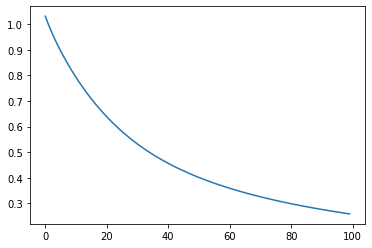

In [52]:
plt.plot(losses)

In [53]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)


## OR Gate

In [54]:
or_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]])

# Creating a PyTorch tensor
or_data = torch.Tensor(or_data)

In [55]:
# Same slicing as np arrays
X = or_data[:,:-1]
y = or_data[:,-1:]

In [56]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [57]:
n_epochs = 100
lr = 5e-1
losses = []

for _ in range(n_epochs):
    # Get predictions
    output = sigmoid(perceptron(X, W, b))

    # Calculate Loss
    loss = binary_cross_entropy(output, y)

    # Do a backward step (to calculate gradients)
    loss.backward()

    # Update Weights
    with torch.no_grad():
        W = W - lr*W.grad
        b = b - lr*b.grad
    W.requires_grad = True
    b.requires_grad = True

    # Append Loss
    losses.append(loss.item())

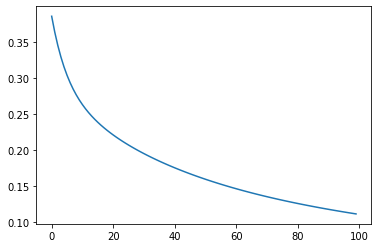

In [58]:
plt.plot(losses)

In [59]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [1]], dtype=torch.int32)


## XOR Gate

In [60]:
xor_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,0]])

# Creating a PyTorch tensor
xor_data = torch.Tensor(xor_data)

In [61]:
# Same slicing as np arrays
X = xor_data[:,:-1]
y = xor_data[:,-1:]

In [62]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [63]:
n_epochs = 100
lr = 5e-1
losses = []

for _ in range(n_epochs):
    # Get predictions
    output = sigmoid(perceptron(X, W, b))

    # Calculate Loss
    loss = binary_cross_entropy(output, y)

    # Do a backward step (to calculate gradients)
    loss.backward()

    # Update Weights
    with torch.no_grad():
        W = W - lr*W.grad
        b = b - lr*b.grad
    W.requires_grad = True
    b.requires_grad = True

    # Append Loss
    losses.append(loss.item())

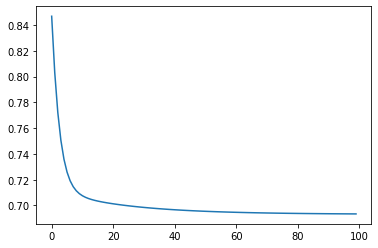

In [64]:
plt.plot(losses)

In [65]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [0],
        [0],
        [0]], dtype=torch.int32)


## Need for MLP

As seen above, we are unable to model the XOR gate using a single layer perceptron, so we need to add a hidden layer.

In [129]:
W1 = torch.randn((10,2), requires_grad=True)
W2 = torch.randn((1,10), requires_grad=True)
b1 = torch.randn((1,10), requires_grad=True)
b2 = torch.randn((1,1), requires_grad=True)

**Implement the `mlp` function** *(1 point)*

In [130]:
def mlp(inputs, W1, W2, b1, b2):
    '''
    Defines the multi-layer perceptron model

    Note: Only 1 hidden layer
    '''
    output = sigmoid(perceptron(inputs, W1, b1))
    output = sigmoid(perceptron(output, W2, b2))

    return output

In [131]:
def weights_update(weights_list, bias_list):
    # Update Weights
    updated_w = []
    updated_b = []
    for w,b in zip(weights_list, bias_list):
        with torch.no_grad():
                w = w - lr*w.grad
                b = b - lr*b.grad
        w.requires_grad = True
        b.requires_grad = True
        updated_w.append(w)
        updated_b.append(b)
    
    return updated_w, updated_b

**Reuse the training loop**

NOTE: It will require slight modification due to the hidden layer

In [132]:
n_epochs = 1000
lr = 5e-1
losses = []
for _ in range(n_epochs):
     # Get predictions
    output = mlp(X, W1, W2, b1, b2)

    # Calculate Loss
    loss = binary_cross_entropy(output, y)

    # Do a backward step (to calculate gradients)
    loss.backward()

    # Update Weights
    (W1,W2),(b1,b2) = weights_update([W1,W2], [b1,b2])

    # Append Loss
    losses.append(loss.item())

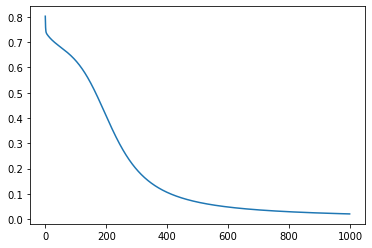

In [133]:
plt.plot(losses)

In [134]:
with torch.no_grad():
  print((mlp(X, W1, W2, b1, b2) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [0]], dtype=torch.int32)
